# **TikTok Project: Preliminary EDA**

<img src="C:\Users\danet\Documents\Images\Bubble logo.png" alt="Logo" style="float:left; width:120px; height:120px;">

## **Introduction**

The goal of this preliminary exploratory data analysis (EDA) is to uncover key relationships within the TikTok claims classification dataset, laying the groundwork for more advanced analysis. By focusing on the distribution of video content types, particularly claims versus opinions, and examining claims status, author ban status, and video engagement metrics, the data team aimed to identify potential trends. Three new engagement columns were created to deepen the analysis. This groundwork enhances the dataset’s utility for building a machine learning model that will improve content moderation, reduce user report backlogs, and ultimately contribute to a safer and more engaging TikTok platform.

## **Dataset Inspection**

* Import packages and upload dataset
* Initial Inspection

In [4]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Load dataset into dataframe
df = pd.read_csv(r'C:\Users\danet\Documents\tiktok_dataset.csv')

In [30]:
# Display and examine the first ten rows of the dataframe
df.head(5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


***Insights***
- Each row represents the claim status of an individual video along video metrics, including but not limited to video id,duration, view count, etc., while also showing a video transcript, the varification status and the ban status.

<br>


In [31]:
# Get summary info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


***Insights***
- The Dataframe contains 19,382 entries, 12 columns, dtypes = float64(5), int64(3), object(4), memory usage of 1.8+ MB. There are 7 columns with 298 null or missing entries.

<br>


In [32]:
# Get summary statistics
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


***Insights***
- There is significant variations in view counts, like counts, share counts, download counts and comment counts suggesting a wide range of video popularity.  Looking at the mean vs median values along with some high standard deviations in the numerical columns indicate the presence of outliers.

<br>


In [33]:
null_claim_status_count = df['claim_status'].isnull().sum()

# Show a preview of the rows with null values in the 'claim_status' column
null_claim_status_rows = df[df['claim_status'].isnull()]

print(f"Total null values in 'claim_status' column: {null_claim_status_count}")
null_claim_status_rows.head()

Total null values in 'claim_status' column: 298


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
19084,19085,NaN,4380513697,39,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19085,19086,NaN,8352130892,60,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19086,19087,NaN,4443076562,25,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19087,19088,NaN,8328300333,7,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19088,19089,NaN,3968729520,8,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


***Insights***
- Investigated the presence of NaN values or Null values within the dataset and found 7 columns, each with 298 rows of null values

<br>


## **Understand the data - Investigate the variables**

I began to investigate the variables more closely to better understand them.

The project proposal states that the ultimate objective is to use machine learning to classify videos as either claims or opinions. Therefore, a good first step is to examine the `claim_status` variable.

In [35]:
# Determine the count of videos for each claim status
claim_status_counts = df['claim_status'].value_counts()
claim_status_counts

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

***Insights***
- Relatively balanced count values for each claim status

<br>


In [37]:
# What is the mean and median view count of videos with "claim" status?
claims = df[df['claim_status'] == 'claim']
print(f"Mean view count claims: {round(claims['video_view_count'].mean(), 2)}")
print(f"Median view count claims: {round(claims['video_view_count'].median(), 2)}")

Mean view count claims: 501029.45
Median view count claims: 501555.0


In [38]:
# What is the mean and median view count of videos with "opinion" status?
opinions = df[df['claim_status'] == 'opinion']
print(f"Mean view count opinions: {round(opinions['video_view_count'].mean(), 2)}")
print(f"Median view count opinions: {round(opinions['video_view_count'].median(), 2)}")

Mean view count opinions: 4956.43
Median view count opinions: 4953.0


***Insights***
- Used Boolean masking to filter the data according to claim status, then calculating the mean and median view counts for each claim status.
- The mean and median values are relatively balanced per category; however, there is a more than 100-fold difference in mean/median view counts between the claims and opinions.

<br>


In [39]:
# Get counts for each group combination of claim status and author ban status
df.groupby(['claim_status', 'author_ban_status']).size().reset_index(name='counts')

,claim_status,author_ban_status,counts
0,claim,active,6566
1,claim,banned,1439
2,claim,under review,1603
3,opinion,active,8817
4,opinion,banned,196
5,opinion,under review,463


In [40]:
# Group by 'claim_status' and 'author_ban_status', and calculate the counts
claims_df = df[df['claim_status'] == 'claim'].groupby(['author_ban_status']).size().reset_index(name='counts')

# Calculate and add the percentage column
claims_df['percentage'] = (claims_df['counts'] / claims_df['counts'].sum()) * 100

# Display the updated DataFrame
claims_df

,author_ban_status,counts,percentage
0,active,6566,68.338884
1,banned,1439,14.977102
2,under review,1603,16.684013


In [43]:
# Group by 'claim_status' and 'author_ban_status', and calculate the counts
opinions_df = df[df['claim_status'] == 'opinion'].groupby(['author_ban_status']).size().reset_index(name='counts')

# Calculate and add the percentage column
opinions_df['percentage'] = (opinions_df['counts'] / opinions_df['counts'].sum()) * 100

# Display the updated DataFrame
opinions_df

,author_ban_status,counts,percentage
0,active,8817,93.045589
1,banned,196,2.068383
2,under review,463,4.886028


***Insights***
- Used `groupby()` to count the number of videos for each combination of claim status and author ban status.
- Active authors are predominant in both claim statuses. However, there is a significant difference: those in the claim category have a much higher number of banned and under-review statuses compared to the opinion category. This suggests that moderation efforts might be more stringent for claims, indicating that claims are more likely to be flagged for review or result in author bans.

<br>


In [45]:
# Group by 'author_ban_status' and calculate median, max, and sum
author_data = df.groupby('author_ban_status').agg(
    number_of_accounts=('author_ban_status', 'size'),
    video_share_count_median=('video_share_count', 'median'),
    video_share_count_max=('video_share_count', 'max'),
    video_share_count_sum=('video_share_count', 'sum')
).reset_index()

# Calculate the total number of accounts
total_number_of_accounts = author_data['number_of_accounts'].sum()

# Calculate the percentage of accounts for each 'author_ban_status'
author_data['percent_of_accounts'] = (author_data['number_of_accounts'] / total_number_of_accounts) * 100

# Calculate the total sum of 'video_share_count'
total_video_share_count = df['video_share_count'].sum()

# Calculate the percentage of each 'video_share_count'
author_data['video_share_count_percent'] = (author_data['video_share_count_sum'] / total_video_share_count) * 100

# Display the updated DataFrame
author_data

,author_ban_status,number_of_accounts,video_share_count_median,video_share_count_max,video_share_count_sum,percent_of_accounts,video_share_count_percent
0,active,15663,437.0,256130.0,217076684.0,80.812094,67.969114
1,banned,1639,14468.0,249672.0,49048271.0,8.456300,15.357557
2,under review,2080,9444.0,238004.0,53250524.0,10.731607,16.673329


***Insights***
- Banned and Under Review authors have significantly higher median video share counts than Active authors.
- Active authors contribute the majority of total video shares, largely because they represent 80.81% of all accounts.
 - The total videos shared by author status shows the Active authors just over 217 million (67.96%) over 4x more than Banned and Under Review statuses at 49M (15.35%) and 53M (16.67%) respectively.
 - The distribution makes sense given the majority presence of active authors.

<br>


In [46]:
# Calculate engagement statistics (count, mean, median) for video views, likes, and shares by author ban status
engagement_stats = df.groupby('author_ban_status').agg({
    'video_view_count': ['count', 'mean', 'median'],
    'video_like_count': ['count', 'mean', 'median'],
    'video_share_count': ['count','mean', 'median']
})
engagement_stats

video_view_count                          video_like_count  \
                             count           mean    median            count   
author_ban_status                                                              
active                       15383  215927.039524    8616.0            15383   
banned                        1635  445845.439144  448201.0             1635   
under review                  2066  392204.836399  365245.5             2066   

                                           video_share_count                \
                            mean    median             count          mean   
author_ban_status                                                            
active              71036.533836    2222.0             15383  14111.466164   
banned             153017.236697  105573.0              1635  29998.942508   
under review       128718.050339   71204.5              2066  25774.696999   

                            
                    median  
author_ban_status           
active               437.0  
banned             14468.0  
under review        9444.0

***Insights***
- Banned authors have high engagement, indicating their content garners significant attention.
- Average video share counts are higher among banned authors (29,998) and those under review (25,774) compared to active authors (14,111), suggesting more frequent sharing due to potentially controversial content.
- Despite being fewer in number (1,635 banned and 2,066 under review vs. 15,383 active), banned and under review authors have much higher average engagement metrics, indicating a potentially impactful minority.

<br>

Create three new columns to help better understand engagement rates:
- `likes_per_view`: represents the number of likes divided by the number of views for each video
- `comments_per_view`: represents the number of comments divided by the number of views for each video
- `shares_per_view`: represents the number of shares divided by the number of views for each video

In [49]:
# Create a likes_per_view column
df['likes_per_view'] = df['video_like_count'] / df['video_view_count']

# Create a comments_per_view column
df['comments_per_view'] = df['video_comment_count'] / df['video_view_count']

# Create a shares_per_view column
df['shares_per_view'] = df['video_share_count'] / df['video_view_count']

df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175


In [50]:
# Calculate engagement stats (count, mean, median) for newly created columns
df.groupby(['claim_status', 'author_ban_status']).agg({
    'video_view_count': ['median'],
    'likes_per_view': ['count', 'mean', 'median'],
    'comments_per_view': ['count', 'mean', 'median'],
    'shares_per_view': ['count', 'mean', 'median']
})

video_view_count likes_per_view            \
                                         median          count      mean   
claim_status author_ban_status                                             
claim        active                    499500.5           6566  0.329542   
             banned                    512572.0           1439  0.345071   
             under review              500774.0           1603  0.327997   
opinion      active                      4958.0           8817  0.219744   
             banned                      5083.5            196  0.206868   
             under review                4884.0            463  0.226394   

                                         comments_per_view            \
                                  median             count      mean   
claim_status author_ban_status                                         
claim        active             0.326538              6566  0.001393   
             banned             0.358909              1439  0.001377   
             under review       0.320867              1603  0.001367   
opinion      active             0.218330              8817  0.000517   
             banned             0.198483               196  0.000434   
             under review       0.228051               463  0.000536   

                                         shares_per_view                      
                                  median           count      mean    median  
claim_status author_ban_status                                                
claim        active             0.000776            6566  0.065456  0.049279  
             banned             0.000746            1439  0.067893  0.051606  
             under review       0.000789            1603  0.065733  0.049967  
opinion      active             0.000252            8817  0.043729  0.032405  
             banned             0.000193             196  0.040531  0.030728  
             under review       0.000293             463  0.044472  0.035027

***Insights***

Impact of Content Type on Engagement:

- Claim videos consistently show higher median view counts, likes per view, comments per view, and shares per view compared to opinion videos across all author ban statuses. This suggests that the type of content (claim vs. opinion) has a significant impact on engagement and attracts more interactions from viewers.

Engagement Metrics for Claim Videos:
- Banned claim videos have the highest median likes per view and shares per view, but have less comments per view compared to active and under review claim videos.
- Under review claim videos also show high engagement, though slightly lower than banned claim videos.
- Active claim videos have the highest comments per view rate, indicating active discussions and engagement.

Engagement Metrics for Opinion Videos:
- Among opinion videos, under review videos have the highest comments per view rate, while active videos have higher likes per view.

Summary:
- Claim videos are generally more engaging in terms of likes, comments, and shares, especially for banned authors. This suggests that claim videos, particularly from banned authors, tend to attract more attention.
- For opinion videos, active and under review authors perform better in terms of engagement rates compared to banned authors.

<br>


### **Summarize Findings for Rosie Mae Bradshaw and the TikTok data team**

Percentage of Claims and Opinions:
- Claims: 49.6% (9608 videos)
- Opinions: 48.9% (9476 videos)
- Missing entries: 1.5% (298 entries out of 19,382 total)

Core Insight: Factors Correlating with a Video's Claim Status:
- Claim videos are more likely to be flagged for review or result in author bans, with banned authors having higher engagement metrics (likes, comments, shares).

Core Insight: Factors Correlating with a Video's Engagement Level:
- Videos from banned and under-review authors have significantly higher engagement (views, likes, shares) compared to active authors, indicating that controversial content garners more attention.

### **Additional Graphs for Reference**

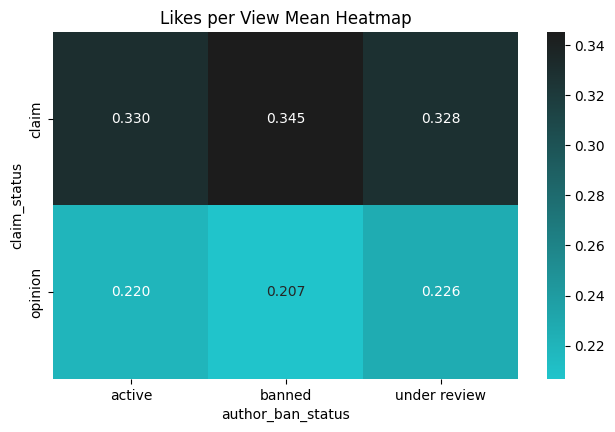

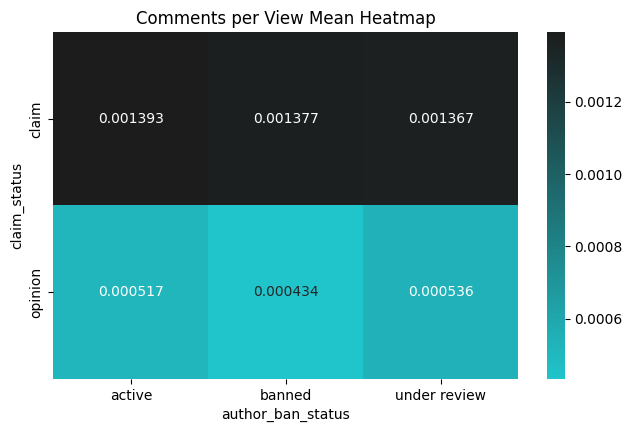

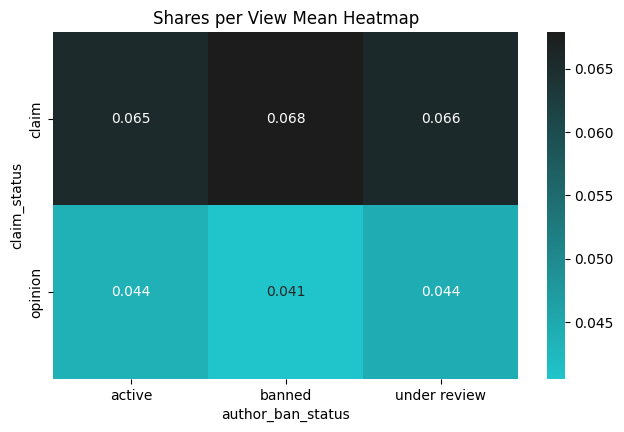

In [55]:
from matplotlib.colors import LinearSegmentedColormap

# Group the data and calculate the required statistics
grouped_data = df.groupby(['claim_status', 'author_ban_status']).agg({
    'likes_per_view': ['mean'],
    'comments_per_view': ['mean'],
    'shares_per_view': ['mean']
}).reset_index()

# Flatten the MultiIndex columns
grouped_data.columns = ['_'.join(col).strip() for col in grouped_data.columns.values]
grouped_data.rename(columns={'claim_status_': 'claim_status', 'author_ban_status_': 'author_ban_status'}, inplace=True)

# Create a custom colormap
colors = ['#20c4cb', '#1c1c1c']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Adjusted figsize
figsize_heatmap = (7.5, 4.5)

# Pivot the data for heatmaps
pivot_likes = grouped_data.pivot(index='claim_status', columns='author_ban_status', values='likes_per_view_mean')
pivot_comments = grouped_data.pivot(index='claim_status', columns='author_ban_status', values='comments_per_view_mean')
pivot_shares = grouped_data.pivot(index='claim_status', columns='author_ban_status', values='shares_per_view_mean')

# Create a heatmap for likes_per_view mean
plt.figure(figsize=figsize_heatmap)
sns.heatmap(pivot_likes, annot=True, fmt=".3f", cmap=cmap)
plt.title('Likes per View Mean Heatmap')
plt.show()

# Create a heatmap for comments_per_view mean
plt.figure(figsize=figsize_heatmap)
sns.heatmap(pivot_comments, annot=True, fmt=".6f", cmap=cmap)
plt.title('Comments per View Mean Heatmap')
plt.show()

# Create a heatmap for shares_per_view mean
plt.figure(figsize=figsize_heatmap)
sns.heatmap(pivot_shares, annot=True, fmt=".3f", cmap=cmap)
plt.title('Shares per View Mean Heatmap')
plt.show()

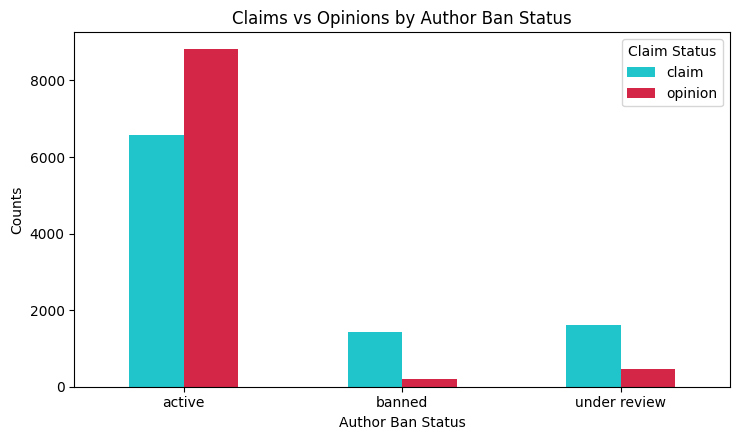

In [58]:
# Create a crosstab to get counts for each claim_status and author_ban_status combination
pivot_df = pd.crosstab(index=df['author_ban_status'], columns=df['claim_status'])

# Define custom colors
colors = ['#20c4cb', '#d42646', '#1c1c1c']

# Plot the bar chart
ax = pivot_df.plot(kind='bar', figsize=(7.5, 4.5), rot=0, color=colors)

# Set the title and labels
plt.title('Claims vs Opinions by Author Ban Status')
plt.xlabel('Author Ban Status')
plt.ylabel('Counts')
plt.legend(title='Claim Status')
plt.tight_layout()

# Show the plot
plt.show()

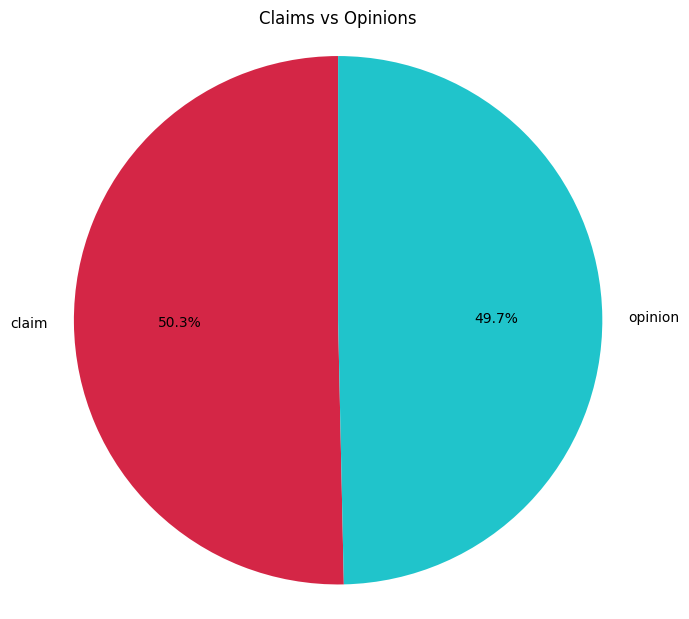

In [59]:
# Create a series with counts for each claim_status
claim_counts = df['claim_status'].value_counts()

# Colors for the two claim statuses
colors = ['#d42646', '#20c4cb']

# Create the pie chart
plt.figure(figsize=(7.5, 7.5))

# Plot the pie chart with the specified colors
plt.pie(claim_counts, labels=claim_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)

# Set the title and labels
plt.title('Claims vs Opinions')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.ylabel('') # Remove y-axis label

# Show the plot
plt.show()

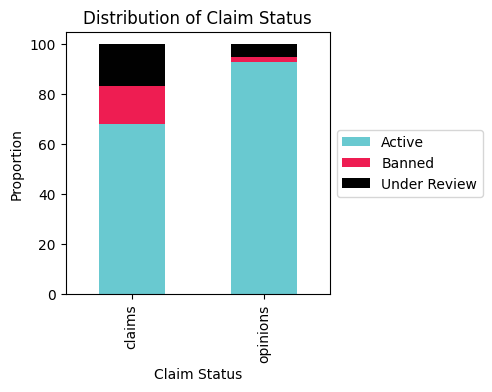

In [63]:
claims_percentages = claims_df['percentage'].values
opinions_percentages = opinions_df['percentage'].values

# Sample data for the stacked bar chart
sample_data = pd.DataFrame({
    'status': ['active', 'banned', 'under review'],
    'claims': claims_percentages,
    'opinions': opinions_percentages
})

# Stacked Bar Chart for Core Insight on Claim Status
plt.figure(figsize=(7.5, 7.5))
plt.subplot(2, 2, 2)
sample_data.set_index('status').T.plot(kind='bar', stacked=True, color=['#69C9D0', '#EE1D52', '#010101'], ax=plt.gca())
plt.title("Distribution of Claim Status")
plt.xlabel("Claim Status")
plt.ylabel("Proportion")
plt.legend(["Active", "Banned", "Under Review"], loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


<br>

### **Additional Tables for Reference**

In [64]:
# Get counts for each group combination of claim status and author ban status
percentage_counts = df.groupby(['claim_status', 'author_ban_status']).size().reset_index(name='counts')

# Calculate the percentage for each group combination
percentage_counts['percentage'] = percentage_counts['counts'] / percentage_counts.groupby('claim_status')['counts'].transform('sum') * 100

percentage_counts

,claim_status,author_ban_status,counts,percentage
0,claim,active,6566,68.338884
1,claim,banned,1439,14.977102
2,claim,under review,1603,16.684013
3,opinion,active,8817,93.045589
4,opinion,banned,196,2.068383
5,opinion,under review,463,4.886028


In [65]:
engagement_metrics = df.groupby(['claim_status']).agg({
    'likes_per_view': ['mean'],
    'comments_per_view': ['mean'],
    'shares_per_view': ['mean']
}).reset_index()

engagement_metrics

,claim_status,likes_per_view,comments_per_view,shares_per_view
,,mean,mean,mean
0,claim,0.331610,0.001386,0.065867
1,opinion,0.219802,0.000516,0.043699


In [66]:
# Get counts for each group combination of claim status and author ban status
counts = df.groupby(['claim_status', 'author_ban_status']).size().reset_index(name='counts')

# Calculate the percentage for each group combination
counts['percentage'] = counts['counts'] / counts.groupby('claim_status')['counts'].transform('sum') * 100

# Calculate the average video_duration_sec for each combination of claim status and author ban status
average_duration = df.groupby(['claim_status', 'author_ban_status'])['video_duration_sec'].mean().reset_index(name='average_video_duration_sec')

# Merge the counts and average duration into one DataFrame
result = pd.merge(counts, average_duration, on=['claim_status', 'author_ban_status'])

result

,claim_status,author_ban_status,counts,percentage,average_video_duration_sec
0,claim,active,6566,68.338884,32.633567
1,claim,banned,1439,14.977102,32.370396
2,claim,under review,1603,16.684013,31.990643
3,opinion,active,8817,93.045589,32.489395
4,opinion,banned,196,2.068383,31.979592
5,opinion,under review,463,4.886028,30.053996


In [67]:
# Determine the count of videos for each claim status
claim_status_counts = df['claim_status'].value_counts().reset_index()
claim_status_counts.columns = ['claim_status', 'counts']

# Calculate the mean video_duration_sec for each claim status (claims and opinions)
mean_duration_claims_opinions = df.groupby('claim_status')['video_duration_sec'].mean().reset_index()
mean_duration_claims_opinions.columns = ['claim_status', 'mean_video_duration_sec']

# Merge the counts and mean duration into one DataFrame
avg_duration_results = pd.merge(claim_status_counts, mean_duration_claims_opinions, on='claim_status')

avg_duration_results

,claim_status,counts,mean_video_duration_sec
0,claim,9608,32.486886
1,opinion,9476,32.359856
